# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [536]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
num_features=data.shape[1]
num_data_points=data.shape[0]
print "Dataset has {} rows, {} columns".format(num_data_points,num_features)
print data.head()  # print the first 5 rows
print data.describe()

'''
TODOs:
1. Create 3-D plot for pca vectors.
2. Apply PCA on ICA-demixed-transformed data.
3. Draw elbow graph to identify k in k-means.
'''

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
             Fresh        Milk     Grocery      Frozen  Detergents_Paper  Delicatessen
count    440.00000   440.00000   440.00000   440.00000         440.00000     440.00000
mean   12000.29773  5796.26591  7951.27727  3071.93182        2881.49318    1524.87045
std    12647.32887  7380.37717  9503.16283  4854.67333        4767.85445    2820.10594
min        3.00000    55.00000     3.00000    25.00000           3.00000       3.00000
25%     3127.75000  1533.00000  2153.00000   742.25000         256.75000     408.25000
50%     8504.00000  3627.00000  4755.50000  1526.00000        

'\nTODOs:\n1. Create 3-D plot for pca vectors.\n2. Apply PCA on ICA-demixed-transformed data.\n3. Draw elbow graph to identify k in k-means.\n'

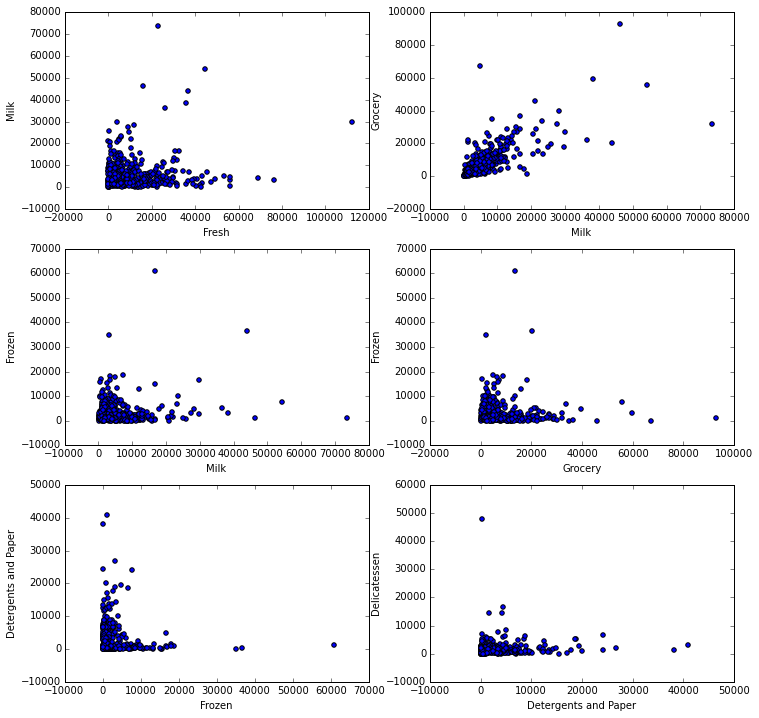

----------------------------------------------------------------------------------------------------
Histogram of spending on specific product types.
----------------------------------------------------------------------------------------------------


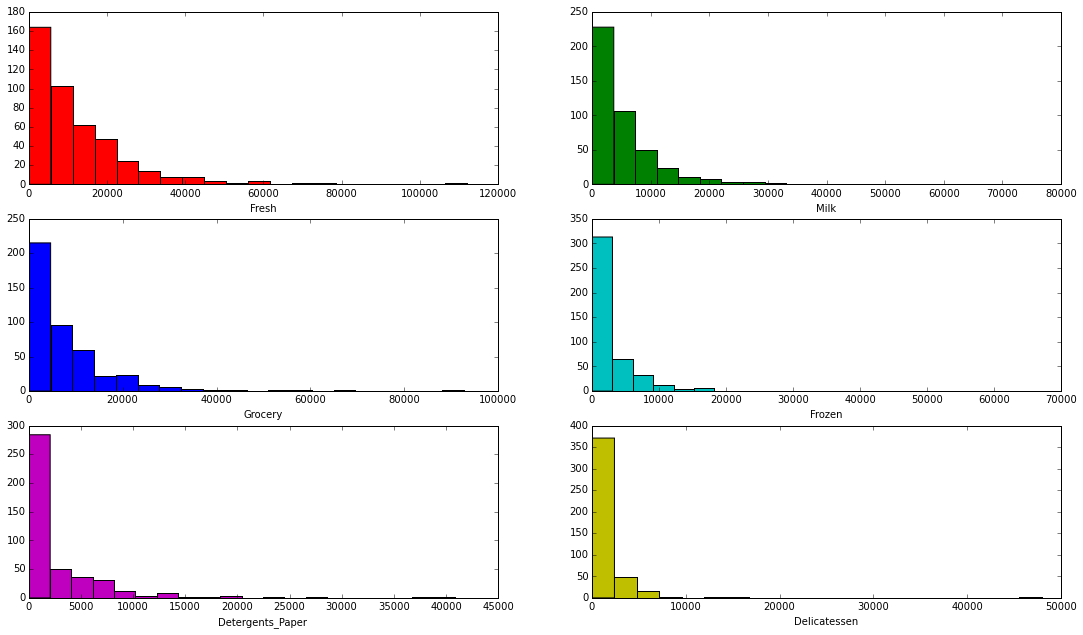

In [537]:
## Cleanup data, remove outliers.

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
ax1.scatter(data.iloc[:,0],data.iloc[:,1])
ax1.set_xlabel('Fresh')
ax1.set_ylabel('Milk')

ax2.scatter(data.iloc[:,1],data.iloc[:,2])
ax2.set_xlabel('Milk')
ax2.set_ylabel('Grocery')


ax3.scatter(data.iloc[:,1],data.iloc[:,3])
ax3.set_xlabel('Milk')
ax3.set_ylabel('Frozen')

ax4.scatter(data.iloc[:,2],data.iloc[:,3])
ax4.set_xlabel('Grocery')
ax4.set_ylabel('Frozen')


ax5.scatter(data.iloc[:,3],data.iloc[:,4])
ax5.set_xlabel('Frozen')
ax5.set_ylabel('Detergents and Paper')


ax6.scatter(data.iloc[:,4],data.iloc[:,5])
ax6.set_xlabel('Detergents and Paper')
ax6.set_ylabel('Delicatessen')

fig = plt.gcf()
fig.set_size_inches(12, 12)
#fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()



print "-"*100
print "Histogram of spending on specific product types."
print "-"*100


f, ((axis1, axis2), (axis3, axis4), (axis5, axis6)) = plt.subplots(3, 2)

### Visualize data spread.
colormap = np.array(['r', 'g', 'b','c','m','y'])
f.axes[0].hist(data.iloc[:,0],bins=20,color=colormap[0])
f.axes[0].set_xlabel(data.columns.values[0]);

f.axes[1].hist(data.iloc[:,1],bins=20,color=colormap[1])
f.axes[1].set_xlabel(data.columns.values[1]);


f.axes[2].hist(data.iloc[:,2],bins=20,color=colormap[2])
f.axes[2].set_xlabel(data.columns.values[2]);

f.axes[3].hist(data.iloc[:,3],bins=20,color=colormap[3])
f.axes[3].set_xlabel(data.columns.values[3]);

f.axes[4].hist(data.iloc[:,4],bins=20,color=colormap[4])
f.axes[4].set_xlabel(data.columns.values[4]);

f.axes[5].hist(data.iloc[:,5],bins=20,color=colormap[5])
f.axes[5].set_xlabel(data.columns.values[5]);

fig = plt.gcf()
fig.set_size_inches(12, 12)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

----------------------------------------------------------------------------------------------------
 Cleaned, centered, and normalized data.
----------------------------------------------------------------------------------------------------


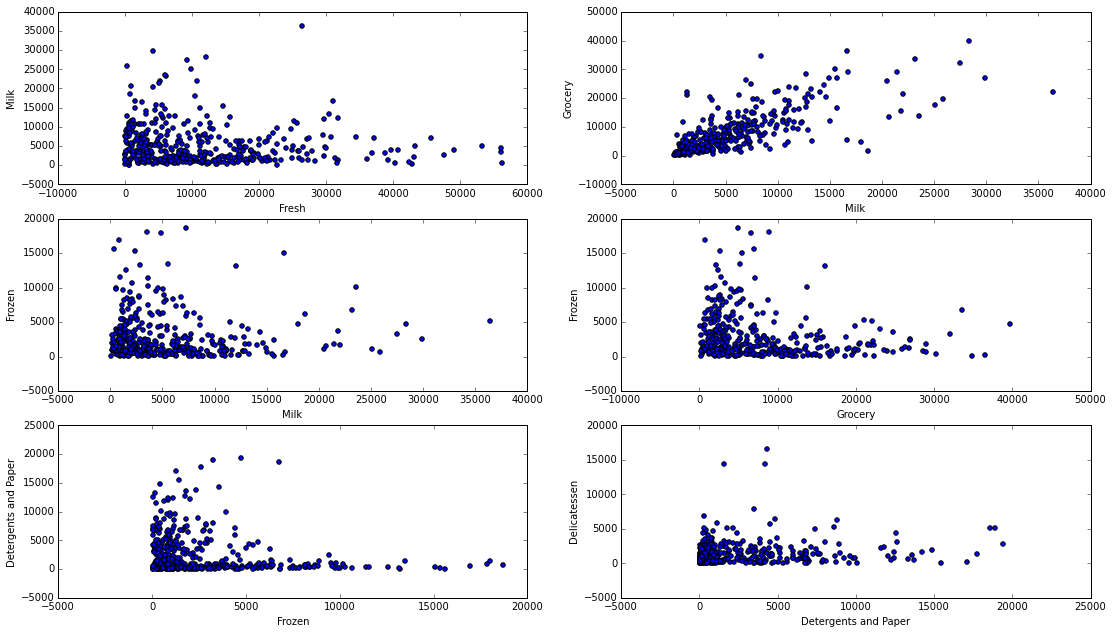

 -> Fresh vs Milk, Milk vs Frozen, Grocery vs Frozen, and Detergent_paper vs Frozen all seem to have inverse relationship.

----------------------------------------------------------------------------------------------------
Histogram of spending on specific product types.
----------------------------------------------------------------------------------------------------


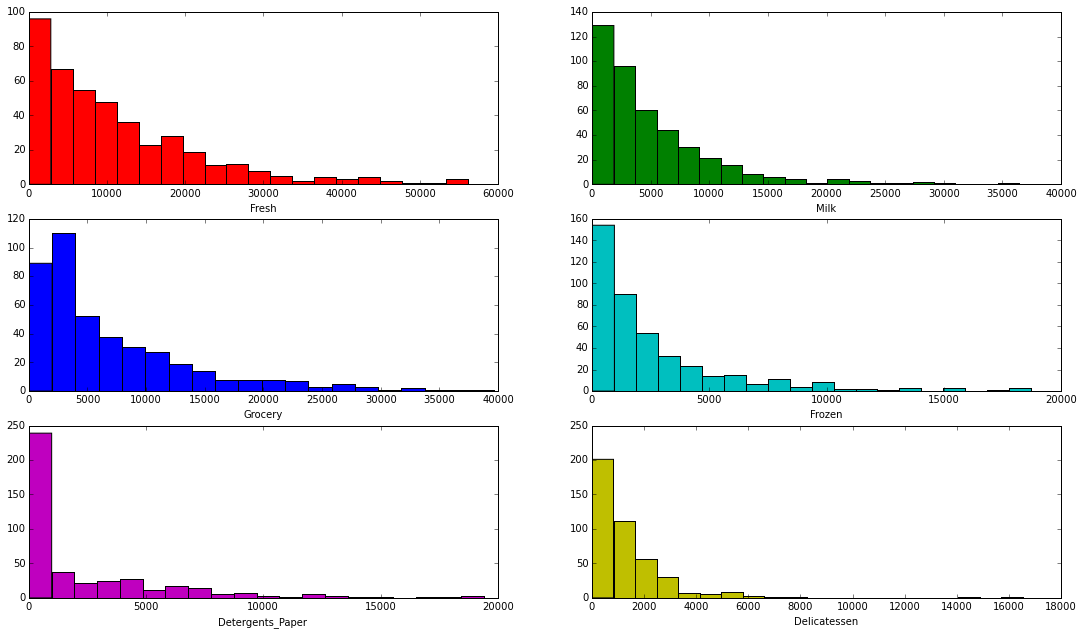

-> Plots of Fresh, Milk, Grocery, and Frozen seems to have some similarity in shape and scale.



In [538]:
## Cleaning outliers could be useful, since it would remove noise which is more prevelent in low-variance components.


cleaned_data=data.copy(deep=True)

cleaned_data=cleaned_data[cleaned_data['Fresh']<60000]
cleaned_data=cleaned_data[cleaned_data['Milk']<50000]
cleaned_data=cleaned_data[cleaned_data['Grocery']<50000]
cleaned_data=cleaned_data[cleaned_data['Frozen']<30000]
cleaned_data=cleaned_data[cleaned_data['Detergents_Paper']<20000]
cleaned_data=cleaned_data[cleaned_data['Delicatessen']<20000]

# Removed scaling since units are same, and feature-wise expenses are part of same expense, i.e. belong to same part.
#from sklearn import preprocessing
#cleaned_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']] = cleaned_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].apply(lambda x: preprocessing.StandardScaler().fit_transform(x))

print '-'*100
print " Cleaned, centered, and normalized data."
print '-'*100
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
ax1.scatter(cleaned_data.iloc[:,0],cleaned_data.iloc[:,1])
ax1.set_xlabel('Fresh')
ax1.set_ylabel('Milk')

ax2.scatter(cleaned_data.iloc[:,1],cleaned_data.iloc[:,2])
ax2.set_xlabel('Milk')
ax2.set_ylabel('Grocery')

ax3.scatter(cleaned_data.iloc[:,1],cleaned_data.iloc[:,3])
ax3.set_xlabel('Milk')
ax3.set_ylabel('Frozen')

ax4.scatter(cleaned_data.iloc[:,2],cleaned_data.iloc[:,3])
ax4.set_xlabel('Grocery')
ax4.set_ylabel('Frozen')


ax5.scatter(cleaned_data.iloc[:,3],cleaned_data.iloc[:,4])
ax5.set_xlabel('Frozen')
ax5.set_ylabel('Detergents and Paper')


ax6.scatter(cleaned_data.iloc[:,4],cleaned_data.iloc[:,5])
ax6.set_xlabel('Detergents and Paper')
ax6.set_ylabel('Delicatessen')

fig = plt.gcf()
fig.set_size_inches(12, 12)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()
print " -> Fresh vs Milk, Milk vs Frozen, Grocery vs Frozen, and Detergent_paper vs Frozen all seem to have inverse relationship.\n"


print "-"*100
print "Histogram of spending on specific product types."
print "-"*100


f, ((axis1, axis2), (axis3, axis4), (axis5, axis6)) = plt.subplots(3, 2)

### Visualize data spread.
colormap = np.array(['r', 'g', 'b','c','m','y'])
f.axes[0].hist(cleaned_data.iloc[:,0],bins=20,color=colormap[0])
f.axes[0].set_xlabel(cleaned_data.columns.values[0]);

f.axes[1].hist(cleaned_data.iloc[:,1],bins=20,color=colormap[1])
f.axes[1].set_xlabel(cleaned_data.columns.values[1]);


f.axes[2].hist(cleaned_data.iloc[:,2],bins=20,color=colormap[2])
f.axes[2].set_xlabel(cleaned_data.columns.values[2]);

f.axes[3].hist(cleaned_data.iloc[:,3],bins=20,color=colormap[3])
f.axes[3].set_xlabel(cleaned_data.columns.values[3]);

f.axes[4].hist(cleaned_data.iloc[:,4],bins=20,color=colormap[4])
f.axes[4].set_xlabel(cleaned_data.columns.values[4]);

f.axes[5].hist(cleaned_data.iloc[:,5],bins=20,color=colormap[5])
f.axes[5].set_xlabel(cleaned_data.columns.values[5]);

fig = plt.gcf()
fig.set_size_inches(12, 12)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

print "-> Plots of Fresh, Milk, Grocery, and Frozen seems to have some similarity in shape and scale.\n"


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

Idea 1. Based on data spread, first PCA would be either fresh, or it could be combination of milk and groceries.
Second PCA could include Frozen and Detergent_Paper, and Third PCA could be delicatessen.

Idea 2. Perishability could be the differentiator in consumables / non-Delicatessen. ICA could identify the size or type of store, as this capability to manage perishables would depend on size or type of business.

###PCA

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]

***** PCA on original data. ***** 

*****  Cumm variance: ***** 
      pca
0 0.45961
1 0.86479
2 0.93482
3 0.97884
4 0.99386
5 1.00000


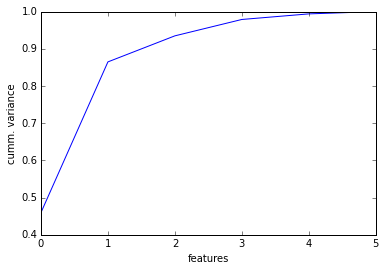

In [539]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
# Using original data
from sklearn.decomposition import PCA
pca = PCA(n_components=num_features,whiten=True)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print data.columns.values
print pca.components_
print pca.explained_variance_ratio_


print "\n",'*'*5,"PCA on original data.",'*'*5,"\n"
pc_df=pd.DataFrame({"pca":pca.explained_variance_ratio_})
pc_cmf_df=np.cumsum(pc_df)
print '*'*5," Cumm variance:",'*'*5,"\n",pc_cmf_df
plt.plot(pc_cmf_df)
plt.ylabel('cumm. variance')
plt.xlabel('features')
plt.show()


['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]

***** PCA on cleaned data. ***** 

*****  Cumm variance: ***** 
      pca
0 0.44083
1 0.72459
2 0.84794
3 0.94189
4 0.98950
5 1.00000


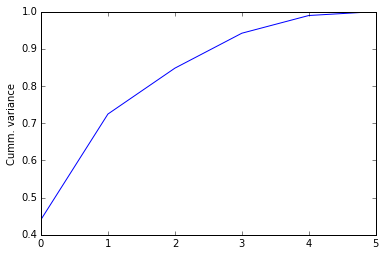

In [540]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
# Using cleaned up data

from sklearn.decomposition import PCA
pca = PCA(n_components=num_features,whiten=True)
pca.fit(scaled_data)

# Print the components and the amount of variance in the data contained in each dimension
print scaled_data.columns.values
print pca.components_
print pca.explained_variance_ratio_


print "\n",'*'*5,"PCA on cleaned data.",'*'*5,"\n"
pc_df=pd.DataFrame({"pca":pca.explained_variance_ratio_})
pc_cmf_df=np.cumsum(pc_df)
print '*'*5," Cumm variance:",'*'*5,"\n",pc_cmf_df
plt.plot(pc_cmf_df)
plt.ylabel('Cumm. variance')


----------------------------------------------------------------------------------------------------
PC1 / PC2: Bi-plot of original data
----------------------------------------------------------------------------------------------------


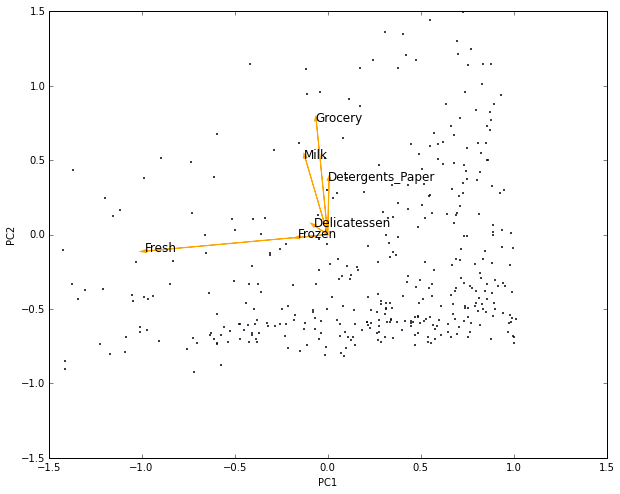

In [541]:
''' Following function has been taken from Udacity Forum: 
https://discussions.udacity.com/t/
having-trouble-with-pca-and-ica-specifically-with-explaining-what-the-dimensions-mean/41890/12
'''

def biplot12(df):
    # Fit on 2 components
    pca = PCA(n_components=2, whiten=True).fit(df)
    
    # Plot transformed/projected data
    ax = pd.DataFrame(
        pca.transform(df),
        columns=['PC1', 'PC2']
    ).plot(kind='scatter', x='PC1', y='PC2', figsize=(10, 8), s=0.8)

    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        ax.annotate(df.columns[i], (pc1, pc2), size=12)

    return ax

print '-'*100
print "PC1 / PC2: Bi-plot of original data"
print '-'*100
ax = biplot12(data)
# Play around with the ranges for scaling the plot
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.show()




**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: Variance drops fast for first 2 dimentions, but then reduces slowly for remaining dimentions.
Given the PCA variance graphs above, elbow is formed at 2nd PCA component, both for original data and scaled data. But since there are data points that have a some variance along multiple PCAs. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer:  PCA here can be used in 2 ways here: 1.) to identify similar customers. 2.)To find similar features. But target here is to find similar customers, and first 2 primary components seem to cover a most of variance. 

Then, first PCA dimention corresponds to a segment that spends mostly on Fresh and Frozen products.

Second PCA corresponds that spend mostly on Grocery, and significantly on Milk and Detergent_Paper in that order.

We can use this information in many ways: 
1.) To transform the data along these 2 PCA, and then find cluster of users using transformed data. But this may not be good approach, since PCA-transformed data might loose some information which could impact be useful for un-biased clustering. 

2.) To do clustering independently, and then compare the results with those from PCA, to see if both these results are convergent of divergent.

3.) We can use the results of PCA further components for supervised learning analysis - regression or classification.

4.) We could also use K=2 and K=3 for k-mens clustering. Although value of K could depend on elbow in sum-of-square vs k plot.

###ICA

In [542]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

scaled_data=data.copy(deep=True)

#from sklearn import preprocessing
scaled_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']] = scaled_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].apply(lambda x: preprocessing.StandardScaler().fit_transform(x))

ica = FastICA(whiten=True,random_state=0)
transformed_data=ica.fit_transform(scaled_data)
#
# Print the independent components

print "\n"
print scaled_data.columns.values
print ica.components_

print "\n"
print preprocessing.StandardScaler().fit_transform(ica.components_)
#print "\n"
#print ica.mixing_




['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[ 0.00259749 -0.01304261  0.06424104  0.00176503 -0.00789576 -0.00472804]
 [ 0.0036662  -0.01675528 -0.11301178  0.00711535  0.13424464  0.01592772]
 [-0.00189529 -0.07279239  0.05444162  0.00183269 -0.01463357  0.01719393]
 [-0.05024607  0.00639506  0.00647498  0.00325086 -0.0104146   0.00291214]
 [-0.00485887 -0.00161266 -0.00552872 -0.00242502  0.0023066   0.05090388]
 [ 0.01091921  0.00104603 -0.00729797 -0.05405923  0.00256987  0.01686439]]


[[ 0.45910575  0.11611315  1.11498351  0.41769164 -0.48743545 -1.21961489]
 [ 0.51224275 -0.02365303 -1.95603618  0.67015972  2.21983183 -0.03356863]
 [ 0.23572202 -2.13321102  0.9452022   0.42088438 -0.6157666   0.03913673]
 [-2.16830789  0.84785851  0.11414921  0.48780439 -0.53541034 -0.78091823]
 [ 0.08837092  0.54640212 -0.09382264  0.21997389 -0.29311692  1.97475038]
 [ 0.87286647  0.64649027 -0.12447609 -2.21651401 -0.28810251  0.02021463]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

['Fresh' 		'Milk'		 'Grocery' 'Frozen'   'Detergents_Paper' 'Delicatessen']

A. [ 0.45910575  0.11611315  1.11498351  0.41769164 -0.48743545 -1.21961489] -- More of Grocery, some Fresh and Frozen, and less Detergent_Paper and Delicacy.

B. [ 0.51224275 -0.02365303 -1.95603618  0.67015972  2.21983183 -0.03356863] -- More of Detergent_paper, some Frozen and Fresh, and less Grocery.

C. [ 0.23572202 -2.13321102  0.9452022   0.42088438 -0.6157666  0.03913673] -- More of Grocery and Frozen, less of Milk and Detergent_paper. 

D. [-2.16830789  0.84785851  0.11414921  0.48780439 -0.53541034 -0.78091823]  -- More of Milk and some Frozen, and less of other things. 

E. [ 0.08837092  0.54640212 -0.09382264  0.21997389 -0.29311692	1.97475038]  -- Lot of Delicacies. 

F. [ 0.87286647  0.64649027 -0.12447609 -2.21651401 -0.28810251 0.02021463]  -- More of Fresh and Milk; less of Frozen.


-> Store of type A and C buy primarily Groceries, but also some Fresh and Frozen..
-> Store B buys Detergent, Paper, and some Fresh and Frozen.
-> D and F buy Fresh, Milk, and Frozen.
-> E mostly buys Delicacies.
-> 


So there are 2 types of Stores:
1.) Buy Fresh and Frozen, and some qty. of Grocery, Detergent_Paper, and  Milk.
2. ) Those buying mostly Delicacies.

So some stores are specialized, while others are general stores.
There could be further classification in general stores, by Groceries, Detergent_Paper, and Milk.



##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

1. k-means is intuitive, and fast.
2. k-means can be computed and stored, for later application. This would allow quickly finding similarity. 

3. But k-means is strict.
4. GMM is more soft, and allows more realistic / fuzzy interpretation of distributions.
5. GMM is fast, but uses all available features. SO it is important to reduce features before applying GMM.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [543]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [544]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

pca = PCA(n_components=2, whiten=True)

reduced_data = pca.fit_transform(scaled_data)
print reduced_data[:10]  # print upto 10 elements

[[-0.11885021  0.23382335]
 [-0.26711547  0.25168977]
 [-0.49875456 -0.6246753 ]
 [ 0.47877384 -0.50025921]
 [-0.10224647 -0.97440489]
 [ 0.09602554  0.22619097]
 [ 0.20616164  0.40235345]
 [-0.08644358  0.17702881]
 [ 0.31808868  0.50532431]
 [-0.9789537   0.56789831]]


In [545]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from scipy.spatial.distance import cdist

clusters = KMeans(init='k-means++', n_clusters=3, n_init=5,max_iter=50).fit(reduced_data)
print clusters

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

KMeans(copy_x=True, init='k-means++', max_iter=50, n_clusters=3, n_init=5,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [546]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids



[[-0.86805823 -3.58675495]
 [-2.15260094  0.79297709]
 [ 0.27639454  0.05157934]]


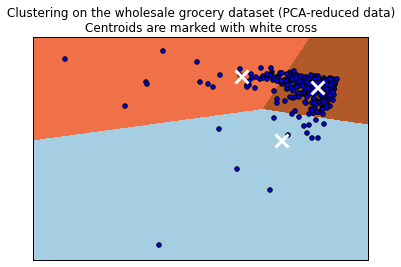

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.86805823 -3.58675495]
 [-2.15260094  0.79297709]
 [ 0.27639454  0.05157934]]
[[ 2.5313216   1.15880753  0.13405979  2.9331118  -0.41997313  2.71082216]
 [-0.39612141  1.82232684  2.17905043 -0.45328578  2.18480011  0.34889612]
 [-0.05480786 -0.25063395 -0.25054991 -0.06415023 -0.22944191 -0.14571954]]


In [547]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.scatter(reduced_data[:,0],reduced_data[:,1])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

print scaled_data.columns.values
print centroids
print pca.inverse_transform(centroids)

[[ 4.2122649   6.36941541]
 [ 0.39263857  0.17522404]
 [ 0.04564055  0.28923646]]

i= 0
mean: [-1.78023351 -1.31147378]
covar: [[ 4.2122649   0.        ]
 [ 0.          6.36941541]]
color: r
inverse of Mean [ 1.02758495  1.7205803   1.42710437  1.19425417  1.1516881   1.58282425]

i= 1
mean: [-0.45956054  0.48667109]
covar: [[ 0.39263857  0.        ]
 [ 0.          0.17522404]]
color: g
inverse of Mean [-0.30319783  0.3546083   0.52570594 -0.3499173   0.57213303 -0.13431829]

i= 2
mean: [ 0.49866584 -0.06883898]
covar: [[ 0.04564055  0.        ]
 [ 0.          0.28923646]]
color: b
inverse of Mean [ 0.01264173 -0.43461999 -0.4828984   0.01339305 -0.46787248 -0.15639131]
['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[ 1.02758495  1.7205803   1.42710437  1.19425417  1.1516881   1.58282425]
 [-0.30319783  0.3546083   0.52570594 -0.3499173   0.57213303 -0.13431829]
 [ 0.01264173 -0.43461999 -0.4828984   0.01339305 -0.46787248 -0.15639131]]


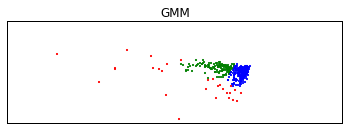

In [548]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
import itertools
from scipy import linalg


gmm=GMM(n_components=3).fit(reduced_data)

ax=plt.scatter(reduced_data[:, 0], reduced_data[:, 1], 0.8, color='b')
color_iter = ['r', 'g', 'b']

print gmm.covars_
splot = plt.subplot(2, 1, 1 )
Y_ = gmm.predict(reduced_data)

for i, (mean, covar, color) in enumerate(zip(
        gmm.means_, gmm._get_covars(), color_iter)):
    print "\ni=",i
    print "mean:", mean
    print "covar:", covar
    print "color:",color
    print "inverse of Mean", pca.inverse_transform(mean)
    v, w = linalg.eigh(covar)
    u = w[0] / linalg.norm(w[0])
    plt.scatter(reduced_data[Y_ == i, 0], reduced_data[Y_ == i, 1], 1.2, color=color)

print data.columns.values
print  pca.inverse_transform(gmm.means_)
plt.xlim(-10, 5)
plt.ylim(-6, 6)
plt.xticks(())
plt.yticks(())
plt.title("GMM")

plt.show()




**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 
Centroids in K_Means are 
1.) Small qty of everything, which means small stores.
2.) Mostly Milk, Grocery, and Detergent_Paper.
3.) Shops buying mostly Fresh, Frozen Milk, and Detergent Paper.

Centroids in GMMs are:
1.) Lots of everything.
2.) Very small qty of everything.
3.) Large qty of at least one thing, for each type of merchandize.


###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer:

Tried multiple number of clusters for GMM and k-means, and 3 seemed best for k-means and also for GMMs.

k-Means groups data based on similarity, while GMM is bayesian and creates a model of mixtures and then assigns data to these models.

Also K-means is based on specific values and identifies centroids, while GMM is probabilistic and estimates the gaussian. 
K-Means assumes that variance of distribution is spherical, while GMM does not make such assumption.

k-means also assumes that observations are homogeneously distributes across clusters, which is not the case here.

K-Means creates hard boundaries, while GMM creates soft boundaries.

GMM identifies hidden variables by means, which is what we are trying to identify here.

All 3 techniques gave different information, and collating all 3 techniques gives confidence in solution. PCA gave more direct info on primary conponents, while ICA and Clustering gave insight into source and unlabeled similarity in data.

But GMMs seem to be best suited for such a problem, as observations are not equally distributed across clusters, and there is no info that suggests that variance distribution is spherical.


As we can see from clusters created using K-means are not clearly separated, and the boudaries dont reflect the inexact distribution of points.

While GMM alows non-linear and soft boundaries, thus allowing more realistic explanation of clustering.

So GMM and ICA provide most info about the latent factors.


**9)** How would you use that technique to help the company design new experiments?

Answer: 
1. Company could test and record results using additional feature set, like time of delivery / sales, 
combine certain features like Fresh and Frozen, or by separating detergent and Paper.

2. Company can also breakup sales for each feature by week / day.

3. Perform classification on each cluster, to identify better components.


**10)** How would you use that data to help you predict future customer needs?

Answer: 
1. We can use day / week data to help identify cyclical patterns
2. Given data can be used to predict sames of one type of product for a customer given its sales of other types of products.
3. Primary components are orthogonal. We can further use k-nearest neighbours to predict how likely is a person to buy Milk, if he already buys fresh produce.

